<a href="https://colab.research.google.com/github/lucasvx273/Data_Visualization/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_CANADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - CANADA

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidades do Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

Contato: lpsterzeck@outlook.com

# Obtenção dos Dados
<left><img alt="Analisando Airbnb" width="20%" src="http://2.bp.blogspot.com/-_IVoCR1Q6RI/T0VWto-rHKI/AAAAAAAABPE/hYrFVZmlmUM/s1600/Dados+estat.jpg"></left>

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Foram compilados ao todo 6 localidades do Canaddá. Ou seja, a análise a seguir contem: Montreal, New Brunswick, Quebec, Toronto, Vancouver e Victoria.


In [1]:
# importação de bibliotecas a serem utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
# importar o arquivo listings.csv dos locais disponíveis do Canada
df_montreal = pd.read_csv("http://data.insideairbnb.com/canada/qc/montreal/2021-12-11/visualisations/listings.csv")
df_brunswick = pd.read_csv("http://data.insideairbnb.com/canada/nb/new-brunswick/2021-12-28/visualisations/listings.csv")
df_quebec = pd.read_csv("http://data.insideairbnb.com/canada/qc/quebec-city/2021-12-11/visualisations/listings.csv")
df_toronto = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-12-05/visualisations/listings.csv")
df_vancouver = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2021-12-11/visualisations/listings.csv")
df_victoria = pd.read_csv("http://data.insideairbnb.com/canada/bc/victoria/2021-12-28/visualisations/listings.csv")

# Juntar dataframers em um
df = pd.concat([df_montreal,df_brunswick,df_quebec,df_toronto,df_vancouver,df_victoria])

# Imprimir cabeçalho
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,152,2,344,2021-12-04,2.46,2,323,14,NaN
1,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,242,3,85,2021-12-03,0.71,2,283,16,NaN
2,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,50,1,157,2021-09-06,1.12,3,350,4,NaN
3,34715,Chez Patrac ! Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire home/apt,160,4,6,2021-11-29,0.04,1,208,2,261 026
4,36301,Romantic & peaceful Plateau loft,381468,Sylvie,NaN,Le Plateau-Mont-Royal,45.53026,-73.58413,Entire home/apt,130,31,42,2021-08-31,0.53,7,176,3,NaN
5,38118,Beautiful room with a balcony in front of a parc,163569,M.,NaN,Ville-Marie,45.52699,-73.55840,Private room,50,10,14,2019-09-15,0.11,3,323,0,NaN
6,46626,Beautiful! Charming! Spacious! Rooms!,208453,Maureen,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.47012,-73.60725,Private room,63,3,24,2021-10-18,0.19,2,365,4,305995
7,50479,L'Arcade Douce (CITQ #271530),231694,Noémie,NaN,Rosemont-La Petite-Patrie,45.54157,-73.60737,Entire home/apt,85,3,157,2021-11-28,1.15,1,33,29,271530
8,66247,Large Loft in Historic Old Montreal,318040,Seb,NaN,Ville-Marie,45.50584,-73.55602,Entire home/apt,110,5,287,2021-11-22,2.15,6,32,23,NaN
9,67514,Double Bed in Room with Skylight,333083,Dan,NaN,Montréal-Ouest,45.45372,-73.65060,Private room,150,3,0,NaN,NaN,1,0,0,NaN


# **Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Após avaliar, foram desconsideradas(excluídas) 4 colunas que não irão agregam em nossa análise:
*   availability_365;
*   number_of_reviews_ltm;
*   license;
*   neighbourhood_group.



In [3]:
# Entendendo o tipo dos dados analisados
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [29]:
# Antes de dar sequência na análise, iremos remover algumas colunas: availability_365,	number_of_reviews_ltm,	license e neighbourhood_group
df.drop(["availability_365", "number_of_reviews_ltm", "license", "neighbourhood_group"], axis='columns', inplace=True)
# Nova visão do Data Frame
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,29059,Lovely studio Quartier Latin,125031,Maryline,Ville-Marie,45.51939,-73.56482,Entire home/apt,152,2,344,2021-12-04,2.46,2
1,29061,Maison historique - Quartier Latin,125031,Maryline,Ville-Marie,45.51929,-73.56493,Entire home/apt,242,3,85,2021-12-03,0.71,2
2,31847,Downtown/Airport room,2319,Gail,Le Sud-Ouest,45.48467,-73.57995,Private room,50,1,157,2021-09-06,1.12,3


In [12]:
# Percentual de dados em branco
df.isnull().sum()/df.shape[0]

id                                 0.000000
name                               0.017514
host_id                            0.000000
host_name                          0.050041
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       19.993995
reviews_per_month                 19.993995
calculated_host_listings_count     0.000000
dtype: float64

**Dos dados em branco**, não foi tomada nenhuma ação de substituição dos valores, uma vez que estes em branco se tratam de informações qualitativas.

Afirmação acima se baseia no fato de praticamente a maior falta de dados ocorrerem nas colunas "last_review" e "reviews_per_month", com quase de 20% de dados em branco.

# **Análise de sentimentos**
É uma mineração contextual do texto que identifica e extrai informações subjetivas no material de origem e ajuda a empresa a entender o sentimento social de sua marca, produto ou serviço enquanto monitora conversas on-line.

<img alt="Nuvem de Palavras" width="40%" src="http://www.webnode.com/pt/blog/files/2013/07/tag-cloud.jpg">

Em nosso caso, será realizada essa análise voltada para o nome dos imóveis oferecidos.

**1º Versão da Núvem de Sentimentos (Sem máscara):**

(-0.5, 1519.5, 534.5, -0.5)

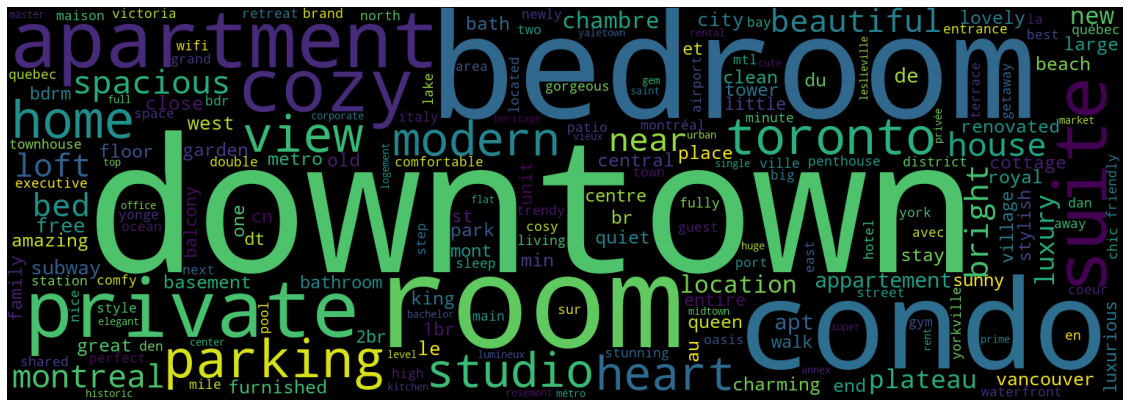

In [6]:
# Biblioteca das Stopwords e Numpy
# !pip install WordCloud
# !pip install Pillow
from wordcloud import WordCloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# DF a ser trabalhada com os nomes
df_name = df["name"].apply(str)

texto = " ".join(s.lower() for s in df_name)

wordcloud = WordCloud(width=1520,height=535,collocations=False).generate(texto)
plt.figure(figsize=(20,9))
plt.imshow(wordcloud)
plt.axis("off")
# Para salvar: plt.savefig('wordcloud.png',transparent=True)

**2º Versão da Núvem de Sentimentos (Com máscara):**

(-0.5, 478.5, 358.5, -0.5)

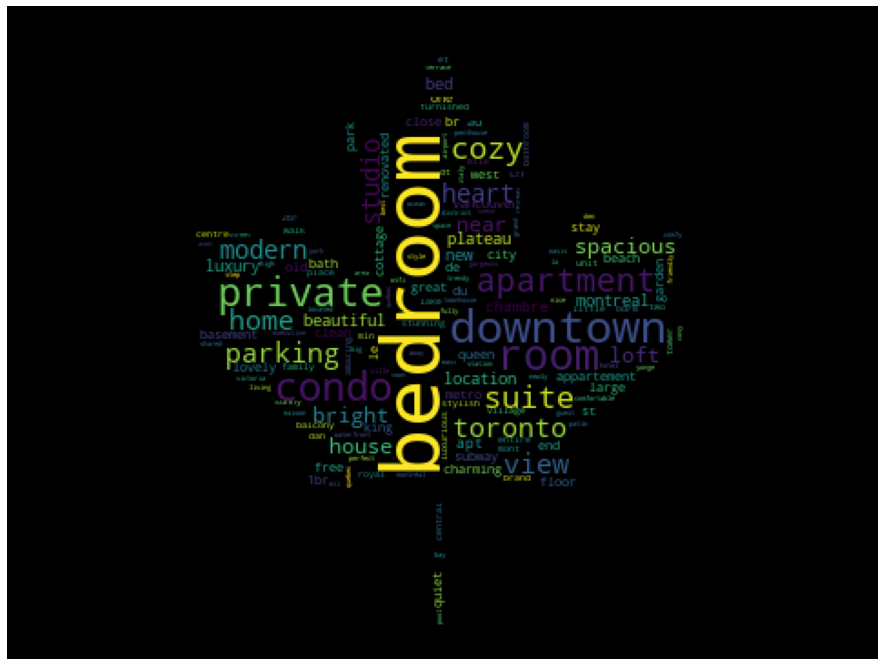

In [143]:
# Biblioteca das Stopwords e Numpy
# !pip install WordCloud
# !pip install Pillow
from wordcloud import WordCloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# DF a ser trabalhada com os nomes
df_name = df["name"].apply(str)

texto = " ".join(s.lower() for s in df_name)

mask = np.array(Image.open("flas2.jpg"))

wordcloud = WordCloud(width=1520,height=935,collocations=False,mask=mask).generate(texto)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis("off")
# Para salvar: plt.savefig('wordcloud.png',transparent=True)

## **exemplo:**
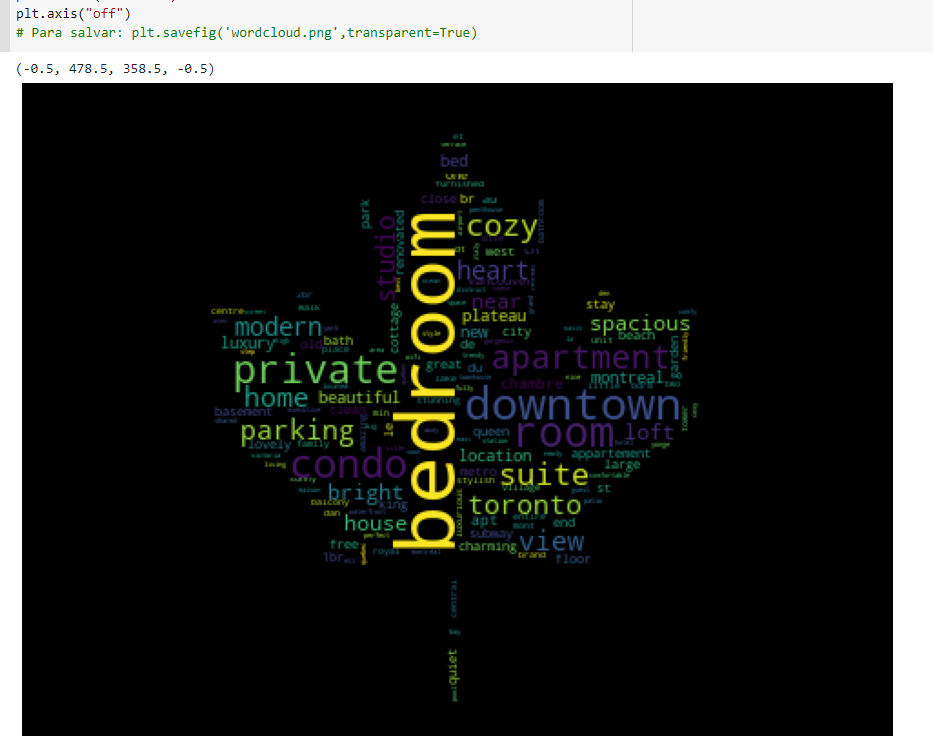

#**Avaliação quantitativa**

Abaixo serão avaliado os dados quantitativos presentes no projeto.

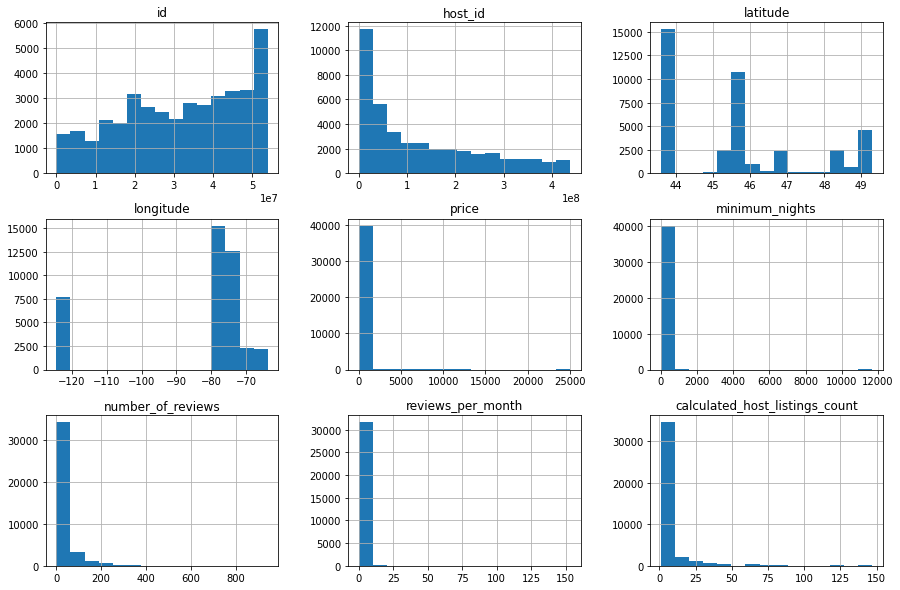

In [30]:
# Histogramas de variáveis numéricas
df.hist(bins=15, figsize=(15,10));

***Pontos observados com base nos dados acima:***

- **price** com uma amplitude muito grande nos dados! para essa análise estaremos "encurtando" esta amplitude do preço do imóvel, deixando este para até o unitário "500";

- **minimum_nights** também apresenta uma amplitude grande! para este serão considerados somente opções com noites mínima de até o unitário "30".


In [67]:
#Salvando back-up da df atual:
df_back = df

# Retirando valores de price acima de 500
df = df[df.price <= 500]

# Retirando valores de noites mínimas acima de 30
df = df[df.minimum_nights <= 30]

df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,29059,Lovely studio Quartier Latin,125031,Maryline,Ville-Marie,45.519390,-73.564820,Entire home/apt,152,2,344,2021-12-04,2.46,2
1,29061,Maison historique - Quartier Latin,125031,Maryline,Ville-Marie,45.519290,-73.564930,Entire home/apt,242,3,85,2021-12-03,0.71,2
2,31847,Downtown/Airport room,2319,Gail,Le Sud-Ouest,45.484670,-73.579950,Private room,50,1,157,2021-09-06,1.12,3
3,34715,Chez Patrac ! Métro Beaubien,149769,Alain,Rosemont-La Petite-Patrie,45.538180,-73.603600,Entire home/apt,160,4,6,2021-11-29,0.04,1
5,38118,Beautiful room with a balcony in front of a parc,163569,M.,Ville-Marie,45.526990,-73.558400,Private room,50,10,14,2019-09-15,0.11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,53925311,Tsonoqua Retreat | Hot Tub with Ocean View!,409331294,Stay Port Renfrew,Juan de Fuca,48.558000,-124.401490,Entire home/apt,294,2,0,NaN,NaN,2
3152,53939131,SPAClOUS MONTHLY FURNISHED RENTAL NEAR THE ClTY,85881488,Hfp Marketing,Esquimalt,48.430150,-123.413120,Entire home/apt,165,1,0,NaN,NaN,7
3153,53969877,Brand new condo in iconic Customs House building,6212229,Lesley,Downtown,48.423336,-123.368576,Entire home/apt,99,29,0,NaN,NaN,1
3154,53979550,HARBOUR VlEWS DOWNTOWN CONDO,85881488,Hfp Marketing,Downtown,48.426310,-123.372080,Entire home/apt,218,1,0,NaN,NaN,7


Com alterações feitas, nova verificação das variáveis price e minimun_nights

Nova variação da PRICE


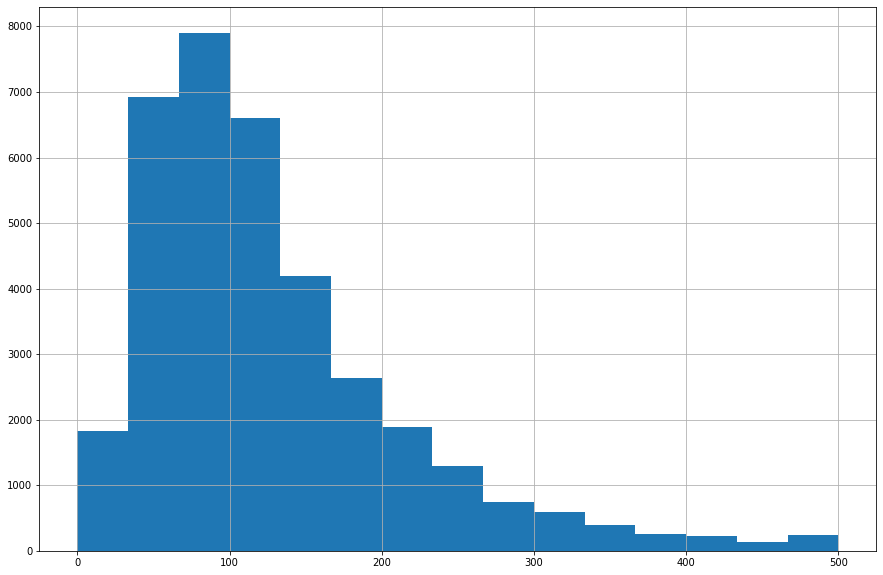

In [68]:
# Histogramas PRICE
print("Nova variação da PRICE")
df.price.hist(bins=15, figsize=(15,10));
plt.show()

Nova variação da MINIMUM_NIGHTS


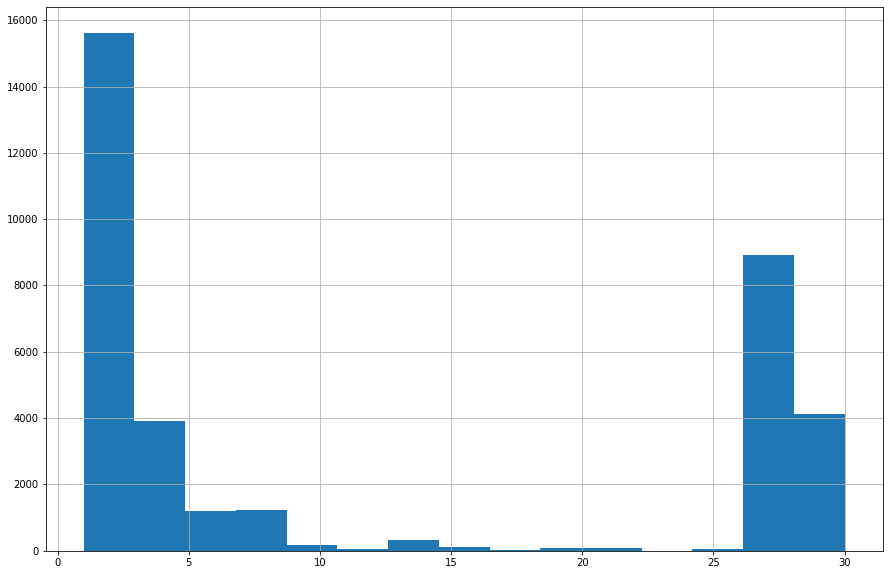

In [81]:
# Histograma MINIMUM_NIGHTS
print("Nova variação da MINIMUM_NIGHTS")
df.minimum_nights.hist(bins=15, figsize=(15,10));
plt.show()

**Mapas por estado**

In [46]:
# Bibliotecas novas:

# !pip install libgeos
# !pip install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
import plotly.express as px
px.set_mapbox_access_token(open("/content/mapbox_token.txt").read())
fig = px.scatter_mapbox(df,
                  lat=df.latitude,
                  lon=df.longitude, 
                  color=df.price,
                  size=df.price,
                  color_continuous_scale=px.colors.cyclical.IceFire,
                  size_max=15,
                  zoom=10)
fig.show()


In [92]:
#Compilado de mapas:::

def plot_map(data_frame):
  px.set_mapbox_access_token(open("/content/mapbox_token.txt").read())
  fig = px.scatter_mapbox(data_frame,
                  lat=data_frame.latitude,
                  lon=data_frame.longitude, 
                  color=data_frame.price,
                  size=data_frame.price,
                  color_continuous_scale=px.colors.cyclical.IceFire,
                  size_max=20,
                  zoom=10)
  fig.show()

df_list = [df_montreal, df_brunswick, df_quebec, df_toronto, df_vancouver, df_victoria]

print("\nMontreal\n")
plot_map(df_montreal)
print("\n\n\nNew Bruswick\n")
plot_map(df_brunswick)
print("\n\n\nQuebec\n")
plot_map(df_quebec)
print("\n\n\nToronto\n")
plot_map(df_toronto)
print("\n\n\nVancouver\n")
plot_map(df_vancouver)
print("\n\n\nVictoria\n")
plot_map(df_victoria)



Montreal






New Bruswick






Quebec






Toronto






Vancouver






Victoria



## **Exemplo:**

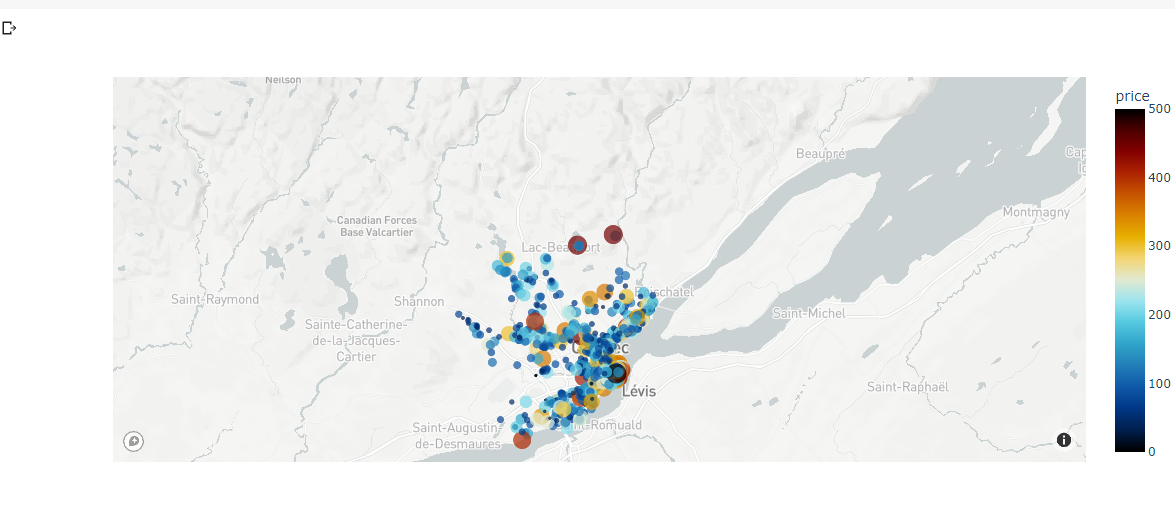

**Avaliando preços**

Aqui será avaliado o preco do imóvel considerando o tipo de quarto(room_type), minimas noites(minimum_nights) e bairro(neighbourhood).


In [96]:
df.dtypes

# room_type
# minimum_nights
# neighbourhood

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
dtype: object

In [119]:
from statistics import median

# Considerações
print("***Contagem dos tipos de quartos dos imóveis disponíveis:\n",df.room_type.value_counts())
print("Consideração: Podemos observar maior disponibilidade para estadias em apartamentos ou casas\n")

print("***Média de preço por tipo de quartos disponíveis:\n",
      round(df.groupby(['room_type']).price.mean().sort_values(ascending=False),2))
print("Consideração: Quartos mais baratos disponíveis tendem a serem os compartilhados\n")

print("***Mediana de preço por tipo de quartos disponíveis:\n",
      round(df.groupby(['room_type']).price.median().sort_values(ascending=False),2))
print("Consideração: Quartos mais baratos disponíveis continuam sendo os mais tendêncioso a custo baixo\n")


***Contagem dos tipos de quartos dos imóveis disponíveis:
 Entire home/apt    25720
Private room        9723
Shared room          317
Hotel room           122
Name: room_type, dtype: int64
Consideração: Podemos observar maior disponibilidade para estadias em apartamentos ou casas

***Média de preço por tipo de quartos disponíveis:
 room_type
Entire home/apt    147.69
Hotel room         140.93
Private room        74.42
Shared room         47.32
Name: price, dtype: float64
Consideração: Quartos mais baratos disponíveis tendem a serem os compartilhados

***Mediana de preço por tipo de quartos disponíveis:
 room_type
Hotel room         157.0
Entire home/apt    125.0
Private room        58.0
Shared room         30.0
Name: price, dtype: float64
Consideração: Quartos mais baratos disponíveis continuam sendo os mais tendêncioso a custo baixo



In [139]:
pd.set_option('display.max_rows', df.shape[0]+1)
print("***Média de preço por bairros:\n",
      round(df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False),2))

print("Consideração: Bairros em imóveis mais economicos estão localizados em:Mount O.S. Jamestown, Blissville e Eldon\n")
print("Consideração2: Bairros em imóveis mais caros estão localizados em:Dufferin, Kars e Montréal-Est\n")


***Média de preço por bairros:
 neighbourhood
Dufferin                                        310.75
Kars                                            294.00
Montréal-Est                                    250.00
Hardwicke                                       245.00
Canterbury                                      239.33
Juan de Fuca                                    227.38
Derby                                           213.67
Sheffield                                       213.00
James Bay                                       211.59
Pointe-de-Sainte-Foy                            204.67
Saint Croix                                     203.92
Southern Gulf Islands                           203.76
Sooke                                           200.49
Greenwich                                       200.00
Durham                                          200.00
Saint Martins                                   199.00
West Point Grey                                 196.96
Grand Falls        

***Média de preço por tipo de quartos disponíveis:
 minimum_nights
4     150.554455
3     149.351135
5     142.297556
6     141.210526
16    139.000000
2     138.259644
11    137.285714
7     133.573109
14    130.518519
9     129.117647
21    124.391892
10    122.608434
30    119.804576
28    119.738467
1     116.829639
8     116.333333
13    112.619048
12    111.477273
29    108.225420
27    105.312500
20     94.134146
15     93.194915
25     86.829787
26     84.500000
24     76.500000
22     75.000000
18     71.666667
23     62.000000
17     60.000000
19     43.400000
Name: price, dtype: float64
Consideração: Normalmente, quanto maior o número de noites mínimas menor tende a ser o custo da estadia



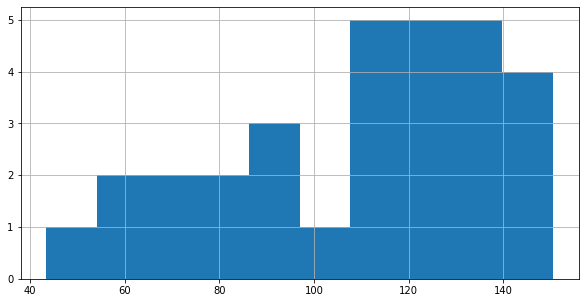

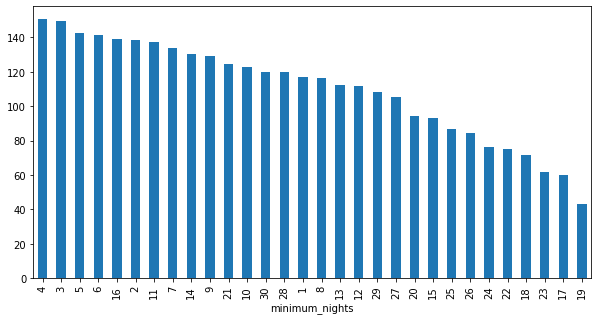

In [138]:
df_minimum = df.groupby(['minimum_nights']).price.mean().sort_values(ascending=False)

print("***Média de preço por tipo de quartos disponíveis:\n",
      df_minimum)
print("Consideração: Normalmente, quanto maior o número de noites mínimas menor tende a ser o custo da estadia\n")
df_minimum.hist(figsize=(10,5))
plt.show()
df_minimum.plot(figsize=(10,5), kind="bar")
plt.show()
# df.hist(bins=15, figsize=(15,10));



## Conclusões

Realizada análise superficial dos dados da Airbnb do Canada, com o intúito de localizar locais mais econômicos possível para uma possível visita no ano de 2023.

Após essa análise ten-se o vies que:
- Quanto maior o número de noites mínimas menor tende a ser o custo do imóvel;
- Bairros mais econômicos são: Mount O.S. Jamestown, Blissville e Eldon;
- Estadias mais baratas estão localizadas em alojamentos do tipo compartilhado;
- É muito mais popular alojamentos do tipo casa/apartamento;
- Dentre as palavras mais utilizadas para se descrever os imóveis temos: studio, parking, donwtonm view, modern, suite, apartamento, cozy, bedroom e beautiful.
